In [22]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

In [23]:
asteroid_data = {"orbital_data":{"orbit_id":"44","orbit_determination_date":"2023-06-19 06:58:22","first_observation_date":"2005-08-03","last_observation_date":"2023-06-18","data_arc_in_days":6528,"observations_used":156,"orbit_uncertainty":"0","minimum_orbit_intersection":".0247638","jupiter_tisserand_invariant":"5.071","epoch_osculation":"2460200.5","eccentricity":".3514114685231003","semi_major_axis":"1.252387001217657","inclination":"3.949444703477999","ascending_node_longitude":"128.1863835042944","orbital_period":"511.9248997066613","perihelion_distance":".8122838459605179","perihelion_argument":"309.9445902961252","aphelion_distance":"1.692490156474795","perihelion_time":"2460402.689036058604","mean_anomaly":"217.8149782852802","mean_motion":".703228149688136","equinox":"J2000","orbit_class":{"orbit_class_type":"APO","orbit_class_description":"Near-Earth asteroid orbits which cross the Earth’s orbit similar to that of 1862 Apollo","orbit_class_range":"a (semi-major axis) > 1.0 AU; q (perihelion) < 1.017 AU"}},"is_sentry_object":False}

In [24]:
asteroid_data['orbital_data']

{'orbit_id': '44',
 'orbit_determination_date': '2023-06-19 06:58:22',
 'first_observation_date': '2005-08-03',
 'last_observation_date': '2023-06-18',
 'data_arc_in_days': 6528,
 'observations_used': 156,
 'orbit_uncertainty': '0',
 'minimum_orbit_intersection': '.0247638',
 'jupiter_tisserand_invariant': '5.071',
 'epoch_osculation': '2460200.5',
 'eccentricity': '.3514114685231003',
 'semi_major_axis': '1.252387001217657',
 'inclination': '3.949444703477999',
 'ascending_node_longitude': '128.1863835042944',
 'orbital_period': '511.9248997066613',
 'perihelion_distance': '.8122838459605179',
 'perihelion_argument': '309.9445902961252',
 'aphelion_distance': '1.692490156474795',
 'perihelion_time': '2460402.689036058604',
 'mean_anomaly': '217.8149782852802',
 'mean_motion': '.703228149688136',
 'equinox': 'J2000',
 'orbit_class': {'orbit_class_type': 'APO',
  'orbit_class_description': 'Near-Earth asteroid orbits which cross the Earth’s orbit similar to that of 1862 Apollo',
  'orbi

<IPython.core.display.Javascript object>


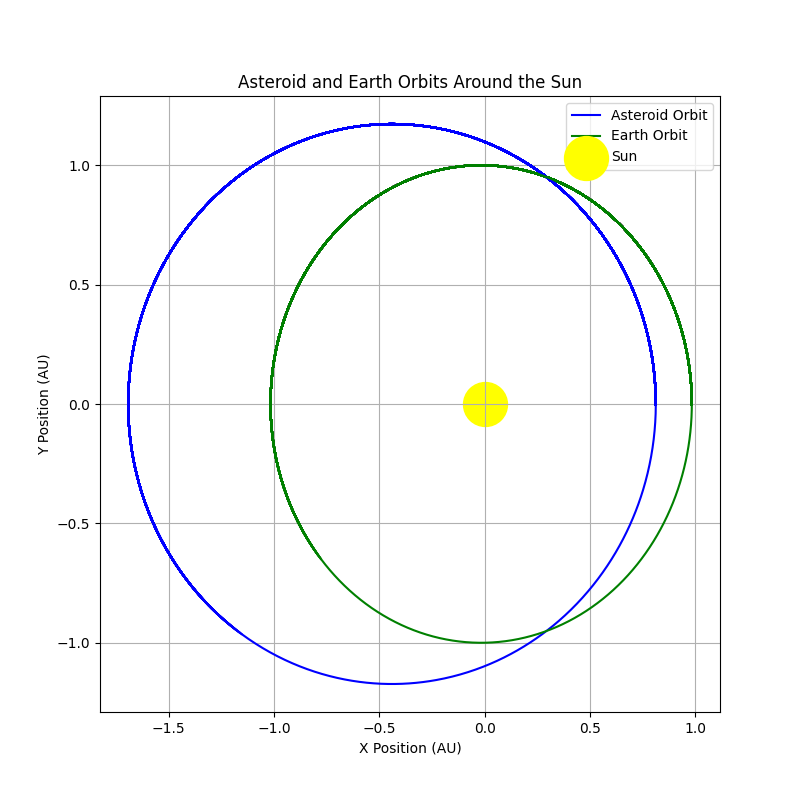

In [86]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_orbital_position(eccentricity, semimajor_axis, true_anomaly):
    r = semimajor_axis * (1 - eccentricity**2) / (1 + eccentricity * np.cos(true_anomaly))
    x = r * np.cos(true_anomaly)
    y = r * np.sin(true_anomaly)
    return x, y

# Orbital elements for the asteroid (replace with your actual data)
asteroid_eccentricity = float(asteroid_data['orbital_data']['eccentricity'])
asteroid_semimajor_axis = float(asteroid_data['orbital_data']['semi_major_axis'])
asteroid_true_anomalies = np.linspace(0, 2 * np.pi, 1000)

# Orbital elements for the Earth (replace with your actual data)
earth_eccentricity = 0.0167
earth_semimajor_axis = 1.0
earth_true_anomalies = np.linspace(0, 2 * np.pi, 1000)

# Calculate orbital positions for the asteroid
asteroid_x_positions, asteroid_y_positions = zip(*[calculate_orbital_position(asteroid_eccentricity, asteroid_semimajor_axis, anomaly)
                                                  for anomaly in asteroid_true_anomalies])

# Calculate orbital positions for the Earth
earth_x_positions, earth_y_positions = zip(*[calculate_orbital_position(earth_eccentricity, earth_semimajor_axis, anomaly)
                                              for anomaly in earth_true_anomalies])

# Plot the orbits
plt.figure(figsize=(8, 8))
plt.plot(asteroid_x_positions, asteroid_y_positions, label='Asteroid Orbit', color='blue')
plt.plot(earth_x_positions, earth_y_positions, label='Earth Orbit', color='green')

# Plot the Sun at the origin
plt.scatter([0], [0], color='yellow', marker='o', s=1000, label='Sun')

# Add labels and title
plt.xlabel('X Position (AU)')
plt.ylabel('Y Position (AU)')
plt.title('Asteroid and Earth Orbits Around the Sun')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


<IPython.core.display.Javascript object>


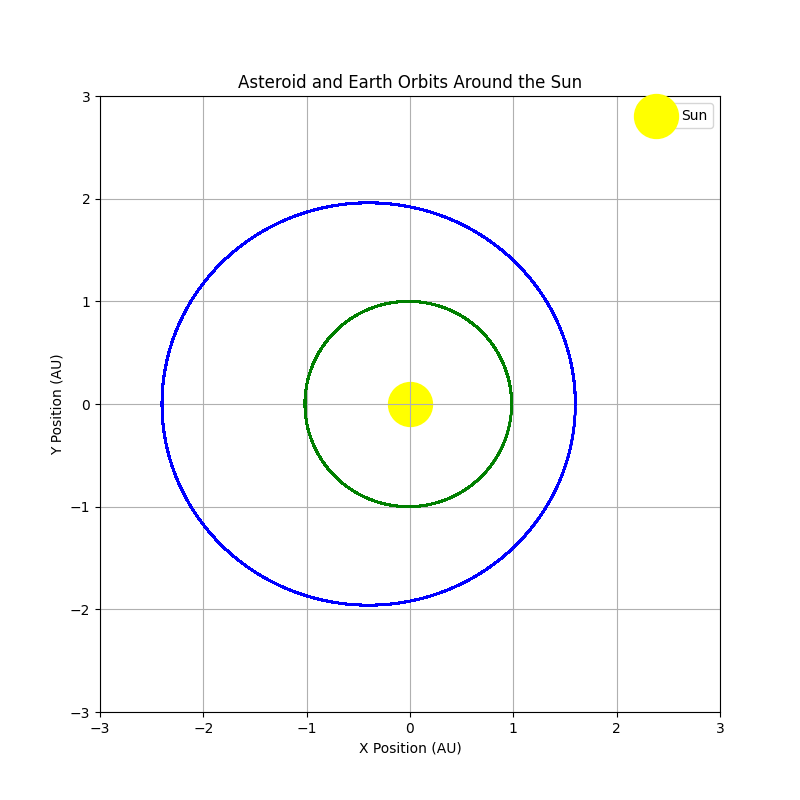

In [95]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation

def calculate_orbital_position(eccentricity, semimajor_axis, true_anomaly):
    r = semimajor_axis * (1 - eccentricity**2) / (1 + eccentricity * np.cos(true_anomaly))
    x = r * np.cos(true_anomaly)
    y = r * np.sin(true_anomaly)
    return x, y

# Orbital elements for the asteroid (replace with your actual data)
asteroid_eccentricity = 0.2
asteroid_semimajor_axis = 2.0
asteroid_true_anomalies = np.linspace(0, 2 * np.pi, 1000)
asteroid_orbital_period = 2 * np.pi / np.sqrt(asteroid_semimajor_axis**3)  # Orbital period formula


# Orbital elements for the Earth (replace with your actual data)
earth_eccentricity = 0.0167
earth_semimajor_axis = 1.0
earth_true_anomalies = np.linspace(0, 2 * np.pi, 1000)

# todo: add initial velocity, and correctly calculate the speed factors.
asteroid_speed_factor = 0.7
earth_speed_factor = 1.0

# Function to update the plot during animation
def update(frame):
    asteroid_frame = int(frame * asteroid_speed_factor) % len(asteroid_x_positions)
    earth_frame = int(frame * earth_speed_factor) % len(earth_x_positions)

    plt.plot(asteroid_x_positions[:asteroid_frame], asteroid_y_positions[:asteroid_frame], color='blue')
    plt.plot(earth_x_positions[:earth_frame], earth_y_positions[:earth_frame], color='green')

# Calculate orbital positions for the asteroid
asteroid_x_positions, asteroid_y_positions = zip(*[calculate_orbital_position(asteroid_eccentricity, asteroid_semimajor_axis, anomaly)
                                                  for anomaly in asteroid_true_anomalies])

# Calculate orbital positions for the Earth
earth_x_positions, earth_y_positions = zip(*[calculate_orbital_position(earth_eccentricity, earth_semimajor_axis, anomaly)
                                              for anomaly in earth_true_anomalies])

# Plot the orbits
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.scatter([0], [0], color='yellow', marker='o', s=1000, label='Sun')
ax.set_xlabel('X Position (AU)')
ax.set_ylabel('Y Position (AU)')
ax.set_title('Asteroid and Earth Orbits Around the Sun')
ax.legend()

# Plot the grid
ax.grid(True)

# Animate the drawing of paths
animation = FuncAnimation(fig, update, frames=len(asteroid_x_positions) * 2, interval=0.1, blit=False)

# Show the animation
plt.show()
